<a href="https://colab.research.google.com/github/skyteck8/BigDataMachineLearning/blob/main/SNS_ACT3_6_CarlosJavierDelgadoBola%C3%B1os.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de los datasets



In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Cargar los datos
data_columns = pd.read_csv('https://raw.githubusercontent.com/skyteck8/BigDataMachineLearning/main/dengue_features_train.csv', sep=',')
data_label = pd.read_csv('https://raw.githubusercontent.com/skyteck8/BigDataMachineLearning/main/dengue_labels_train.csv', sep=',')

# Combinar los datasets
df_train = pd.merge(data_columns, data_label, on=['city', 'year', 'weekofyear'])

df_train['week_start_date'] = pd.to_datetime(df_train['week_start_date'])

# Identificar columnas numéricas y categóricas
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns.drop(['total_cases'])  # Asumimos que 'total_cases' es la variable objetivo
categorical_features = df_train.select_dtypes(include=['object']).columns
target_feature = 'total_cases'  # Nombre de la variable objetivo

# Rellenar valores nulos para características numéricas
imputer_num = SimpleImputer(strategy='median')
df_train[numeric_features] = imputer_num.fit_transform(df_train[numeric_features])

# Rellenar valores nulos para características categóricas
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train[categorical_features] = imputer_cat.fit_transform(df_train[categorical_features])

# Escalar características numéricas
scaler = StandardScaler()
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

# Aplicar codificación One-Hot a las variables categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' reduce multicolinealidad
encoded_cats = encoder.fit_transform(df_train[categorical_features])
cat_feature_names = encoder.get_feature_names_out(categorical_features)


# df_encoded_cats = df_train[categorical_features]
df_encoded_cats = pd.DataFrame(encoded_cats, columns=cat_feature_names)
# Unir el DataFrame original (sin las categóricas originales) con el nuevo DataFrame de categóricas codificadas
df_train_final = pd.concat([df_train.drop(categorical_features, axis=1), df_encoded_cats], axis=1)

# Dividir los datos en conjuntos de entrenamiento, prueba y validación
X = df_train_final.drop(target_feature, axis=1)  # Características
y = df_train_final[target_feature]  # Variable objetivo

# Primero dividimos en entrenamiento y temporal (prueba + validación)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Luego dividimos el temporal en prueba y validación
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ahora tenemos los conjuntos X_train, y_train para entrenamiento
# X_val, y_val para validación y X_test, y_test para prueba

In [ ]:
X_train.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj
314,-0.930664,-0.433150,1996-05-13,-0.089263,-0.496378,-0.782836,-0.522129,-0.551457,-0.814692,-1.270888,...,0.096910,-0.551457,-0.619178,-0.897754,-1.060016,-1.187586,-1.571380,0.061885,0.121135,1.0
442,-0.560736,1.165328,1998-10-29,-1.347962,-1.721687,-1.254607,-1.317476,3.143287,0.845152,0.604398,...,0.240799,3.143287,1.058581,-0.792743,0.409779,-0.908687,0.176190,0.764326,0.329128,1.0
319,-0.930664,-0.100134,1996-06-17,-0.529165,-0.557070,-0.785566,-0.551816,0.051387,-0.155807,-0.526456,...,0.164646,0.051387,0.039842,-0.837171,-0.588784,-1.065143,-0.954591,0.445035,0.965843,1.0
765,0.734012,-1.632009,2005-01-15,-0.887556,-1.269040,-0.956923,-0.899297,-1.050187,-0.811534,-1.282253,...,-0.470031,-1.050187,-1.109958,-0.841210,-1.564908,-1.262413,-2.136771,0.061885,0.350352,1.0
754,0.549048,1.165328,2004-10-28,-0.460772,-0.358440,-1.469244,-1.007574,1.172726,0.877780,0.740782,...,-0.209507,1.172726,0.660752,-0.711966,0.241481,-1.139969,-0.389200,1.147476,-0.105960,1.0


<ipython-input-23-81e7452b2c05>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train_final.corr()


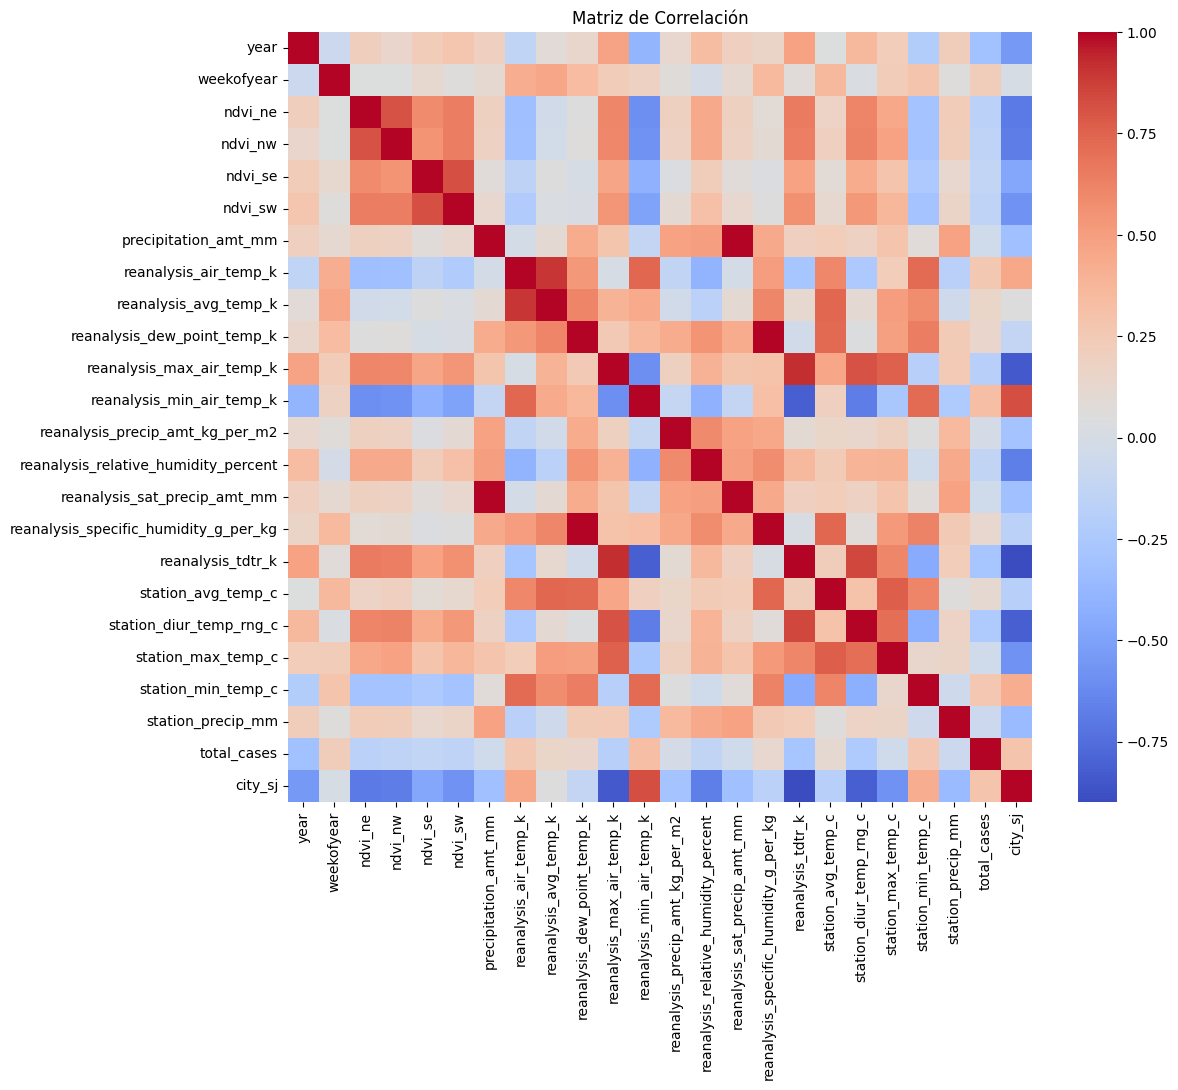

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_train_final es tu DataFrame final después del procesamiento
correlation_matrix = df_train_final.corr()

# Dibujar el heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
from sklearn.feature_selection import f_regression

df_to_select_best = X_train.drop("week_start_date", axis=1)
# df_to_select_best.head()
# Calcular puntuaciones y p-values con f_regression
scores, p_values = f_regression(df_to_select_best, y_train)

# Crear un DataFrame para tener una mejor visualización de las características con sus puntuaciones y p-values
features_scores = pd.DataFrame({'Feature': df_to_select_best.columns, 'Score': scores, 'P-value': p_values})
features_scores = features_scores.sort_values(by='Score', ascending=False)  # Ordenar por Score de manera descendente

print(features_scores)

                                  Feature       Score       P-value
0                                    year  104.381972  3.201389e-23
11              reanalysis_min_air_temp_k   93.550850  4.347542e-21
22                                city_sj   74.421794  2.958580e-17
16                      reanalysis_tdtr_k   71.344420  1.247253e-16
20                     station_min_temp_c   60.676039  1.910257e-14
7                   reanalysis_air_temp_k   50.207823  2.854463e-12
18                station_diur_temp_rng_c   45.495558  2.785915e-11
1                              weekofyear   35.440793  3.809222e-09
10              reanalysis_max_air_temp_k   32.835544  1.381417e-08
2                                 ndvi_ne   22.533992  2.412748e-06
9             reanalysis_dew_point_temp_k   14.766372  1.305237e-04
8                   reanalysis_avg_temp_k   13.593656  2.409993e-04
3                                 ndvi_nw   13.385194  2.688580e-04
5                                 ndvi_sw   13.3

In [ ]:
X_tr = X_train.drop(["week_start_date", "reanalysis_precip_amt_kg_per_m2", "station_max_temp_c", "precipitation_amt_mm", "reanalysis_sat_precip_amt_mm", "station_precip_mm", "ndvi_se", "station_avg_temp_c", "reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "ndvi_sw", "ndvi_nw", "reanalysis_avg_temp_k", "reanalysis_dew_point_temp_k", "ndvi_ne"], axis=1)
X_v = X_val.drop(["week_start_date","reanalysis_precip_amt_kg_per_m2", "station_max_temp_c", "precipitation_amt_mm", "reanalysis_sat_precip_amt_mm", "station_precip_mm", "ndvi_se", "station_avg_temp_c", "reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "ndvi_sw", "ndvi_nw", "reanalysis_avg_temp_k", "reanalysis_dew_point_temp_k", "ndvi_ne"], axis=1)
X_te = X_test.drop(["week_start_date","reanalysis_precip_amt_kg_per_m2", "station_max_temp_c", "precipitation_amt_mm", "reanalysis_sat_precip_amt_mm", "station_precip_mm", "ndvi_se", "station_avg_temp_c", "reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "ndvi_sw", "ndvi_nw", "reanalysis_avg_temp_k", "reanalysis_dew_point_temp_k", "ndvi_ne"], axis=1)

In [ ]:
X_tr.head()

,year,weekofyear,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_diur_temp_rng_c,station_min_temp_c,city_sj
314,-0.930664,-0.433150,-0.814692,-1.029961,0.186834,-0.897754,-1.187586,0.061885,1.0
442,-0.560736,1.165328,0.845152,-0.409513,0.773697,-0.792743,-0.908687,0.764326,1.0
319,-0.930664,-0.100134,-0.155807,-0.812804,0.538952,-0.837171,-1.065143,0.445035,1.0
765,0.734012,-1.632009,-0.811534,-1.402230,0.186834,-0.841210,-1.262413,0.061885,1.0
754,0.549048,1.165328,0.877780,-0.316446,1.125815,-0.711966,-1.139969,1.147476,1.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
random_forest.fit(X_tr, y_train)

# Realizar predicciones en el conjunto de validación para evaluar el modelo
y_pred_val = random_forest.predict(X_v)

# Opcional: Evaluar el modelo utilizando métricas adecuadas, por ejemplo, el error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
mse_val = mean_squared_error(y_val, y_pred_val)
print(f"Error Cuadrático Medio en el conjunto de validación: {mse_val}")

# Realizar predicciones en el conjunto de prueba para evaluar la generalización del modelo
y_pred_test = random_forest.predict(X_te)

# Evaluar el modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse_test}")


# Calcular MAPE en el conjunto de validación
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)
print(f"MAPE en el conjunto de validación: {mape_val*100:.2f}%")

# Calcular MAPE en el conjunto de prueba
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print(f"MAPE en el conjunto de prueba: {mape_test*100:.2f}%")

Error Cuadrático Medio en el conjunto de validación: 635.719056701031
Error Cuadrático Medio en el conjunto de prueba: 981.509019520548
MAPE en el conjunto de validación: 142753274786479280.00%
MAPE en el conjunto de prueba: 217715110753294336.00%


In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

# Asumiendo que tu problema es de regresión, dado que 'total_cases' suena como un conteo.
# Si fuera una clasificación, utilizarías LazyClassifier en lugar de LazyRegressor.

# Crear una instancia de LazyRegressor
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Ajustar y comparar modelos
models, predictions = lazy_reg.fit(X_tr, X_te, y_train, y_test)

# Ver los resultados
print(models)

100%|██████████| 42/42 [00:16<00:00,  2.51it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 873, number of used features: 9
[LightGBM] [Info] Start training from score 23.580756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
XGBRegressor                                 0.70       0.71  26.40   
ExtraTreesRegressor                          0.66       0.67  28.28   
GradientBoostingRegressor                    0.59       0.60  30.89   
HistGradientBoostingRegressor                0.59       0.60  31.09   
RandomForestRegressor                        0.58       0.60  31.13   
LGBMRegressor           

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Entrenar el modelo XGBRegressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_tr, y_train)

# Predecir los valores de y en el conjunto de entrenamiento
y_pred = xgb_reg.predict(X_tr)

# Calcular MAE
mae = mean_absolute_error(y_train, y_pred)

# Calcular MAPE
mape = mean_absolute_percentage_error(y_train, y_pred)

# Calcular R² (coeficiente de determinación)
r2 = r2_score(y_train, y_pred)

mae, mape, r2

(0.36765965128281203, 57978752798302.47, 0.9998368550269814)

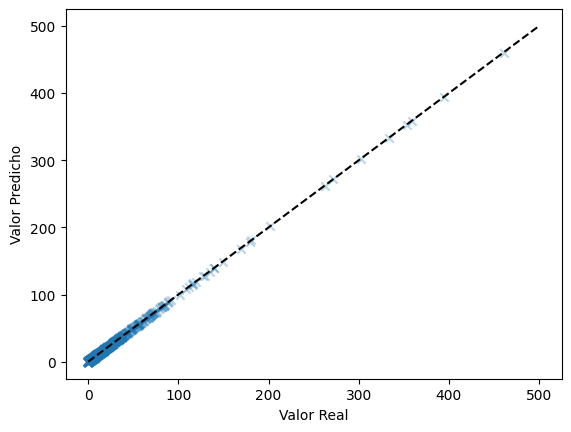

In [ ]:
# Gráfica de dispersión entre los valores reales de la variable dependiente y los valores predichos

plt.scatter(y_train, y_pred , alpha = 0.3, marker = 'x')
plt.plot([0, 500], [0, 500], "--k")
plt.axis("tight")
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Entrenar el modelo XGBRegressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_te, y_test)

# Predecir los valores de y en el conjunto de entrenamiento
y_pred = xgb_reg.predict(X_te)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calcular R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

mae, mape, r2

(0.025130279711048975, 10826231038176.441, 0.9999994571770052)

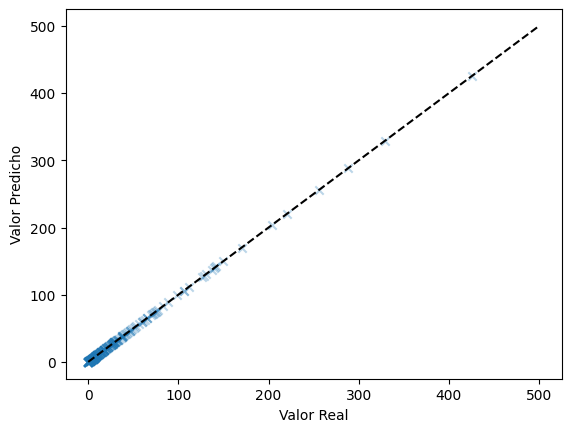

In [ ]:
# Gráfica de dispersión entre los valores reales de la variable dependiente y los valores predichos

plt.scatter(y_test, y_pred , alpha = 0.3, marker = 'x')
plt.plot([0, 500], [0, 500], "--k")
plt.axis("tight")
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.show()

In [ ]:
X_tr

,year,weekofyear,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_diur_temp_rng_c,station_min_temp_c,city_sj
314,-0.93,-0.43,-0.81,-1.03,0.19,-0.90,-1.19,0.06,1.00
442,-0.56,1.17,0.85,-0.41,0.77,-0.79,-0.91,0.76,1.00
319,-0.93,-0.10,-0.16,-0.81,0.54,-0.84,-1.07,0.45,1.00
765,0.73,-1.63,-0.81,-1.40,0.19,-0.84,-1.26,0.06,1.00
754,0.55,1.17,0.88,-0.32,1.13,-0.71,-1.14,1.15,1.00
...,...,...,...,...,...,...,...,...,...
1095,0.36,0.23,-1.63,0.61,-2.55,1.85,1.11,-2.62,0.00
1130,0.55,-0.90,-1.02,0.02,-0.67,0.23,0.60,0.96,0.00
1294,1.10,-0.37,-1.08,1.20,-1.26,1.15,1.20,-0.26,0.00
860,0.92,1.23,1.61,-0.19,1.36,-0.65,-0.91,1.47,1.00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Inicializar el modelo XGBRegressor con un objetivo especificado
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Definir la cuadrícula de hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_tr, y_train)

# Mejores hiperparámetros según GridSearchCV
print("Mejores hiperparámetros (GridSearchCV):", grid_search.best_params_)

# Definir la distribución de hiperparámetros para RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_distributions, n_iter=100, cv=3, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search.fit(X_tr, y_train)

# Mejores hiperparámetros según RandomizedSearchCV
print("Mejores hiperparámetros (RandomizedSearchCV):", random_search.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mejores hiperparámetros (GridSearchCV): {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores hiperparámetros (RandomizedSearchCV): {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Entrenar el modelo XGBRegressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_te, y_test)

# Predecir los valores de y en el conjunto de entrenamiento
y_pred = xgb_reg.predict(X_te)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calcular R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

mae, mape, r2

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Entrenar el modelo XGBRegressor con los hiperparámetros especificados
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    subsample=1.0,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    colsample_bytree=1.0
)

# Asegúrate de que estás usando el conjunto de entrenamiento para ajustar el modelo
# Parece que hay un error en tu código original, ya que usas X_te y y_test para entrenar en lugar de un conjunto de entrenamiento
# Aquí lo corrijo asumiendo que tienes variables X_train y y_train para entrenar
xgb_reg.fit(X_tr, y_train)  # Asumiendo que tienes X_train y y_train

# Predecir los valores de y en el conjunto de prueba
# Asegúrate de que X_te sea tu conjunto de prueba (X_test) y y_test sea realmente tu conjunto de prueba
y_pred = xgb_reg.predict(X_te)  # Asumiendo que X_test es tu conjunto de prueba

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calcular R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

(mae, mape, r2)

(12.970887395004704, 2252286213215724.0, 0.6797784843488568)

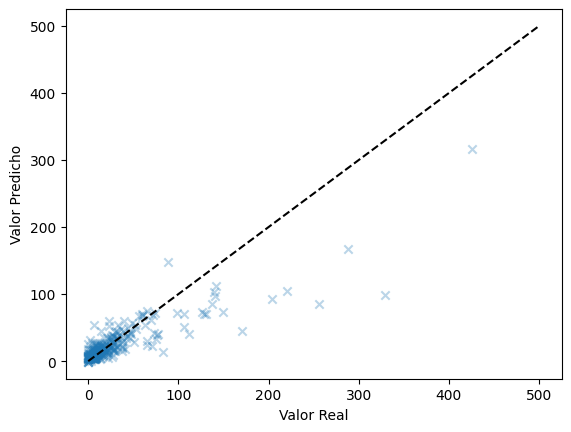

In [ ]:
# Gráfica de dispersión entre los valores reales de la variable dependiente y los valores predichos

plt.scatter(y_test, y_pred , alpha = 0.3, marker = 'x')
plt.plot([0, 500], [0, 500], "--k")
plt.axis("tight")
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.show()